# Conditional Response: Evolution Through Programming Course, Week 7
## By Sarit Moses and Itamar Nini

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# define functions to calculate fitness of a mixed population
# note - there is a difference between the published assignment and the map in the equation to be calculated
# (equation 13 in the paper)
# we decided to go with the version of the paper

def calc_fitness_diff(f, p, eta, kappa, Ts1, alpha, delta_t):
    """
    Calculates the avrage fitness advantage for having frequency of f conditional responders.
    Args:
        f: frequency of conditional responders.
        p: probability of S2 follows S1
        eta: cost parameter
        kappa: benefit coefficient
        Ts1: duration of S1 exposure
        alpha: degredation rate
        delta_t: delay between S1 and S2
    """
    e = np.e
    benefit = p * (((1 - eta) * kappa * (1 - math.exp(-alpha * delta_t))) / alpha - (eta * delta_t))
    cost = (1 - p) * (-eta * Ts1)
    delta_f_cr_minus_dr = benefit - cost
    delta_f_cr_dr = p * (((1 - eta) * kappa * (1 - math.exp(-alpha * delta_t))) / alpha - (eta * delta_t)) + (1 - p) * eta * Ts1
    delta_F_mixed = f * delta_f_cr_minus_dr
    delta_f_mixed = f * delta_f_cr_dr
    return delta_F_mixed

In [3]:
# define model parameters (taken from the paper):

delta_t = 3  # Delay between S1 and S2 in hours. The model used it to simulate something passing through the digestive track
eta = 0.1   # Cost parameter
alpha = np.log(2) # Dilution/degradation rate (ln(2))
kappa = 0.5   # Benefit coefficient
Ts1 = 1

# eta, kappa and Ts1 exact values were not mentioned in the paper. I chose arbitraty values. 

In [4]:
# create grids for p and f:

p_values = np.linspace(0, 1, 100) # 100 points between 0 and 1
f_values = np.linspace(0, 1, 100) # 100 points between 0 and 1

P, F = np.meshgrid(p_values, f_values)

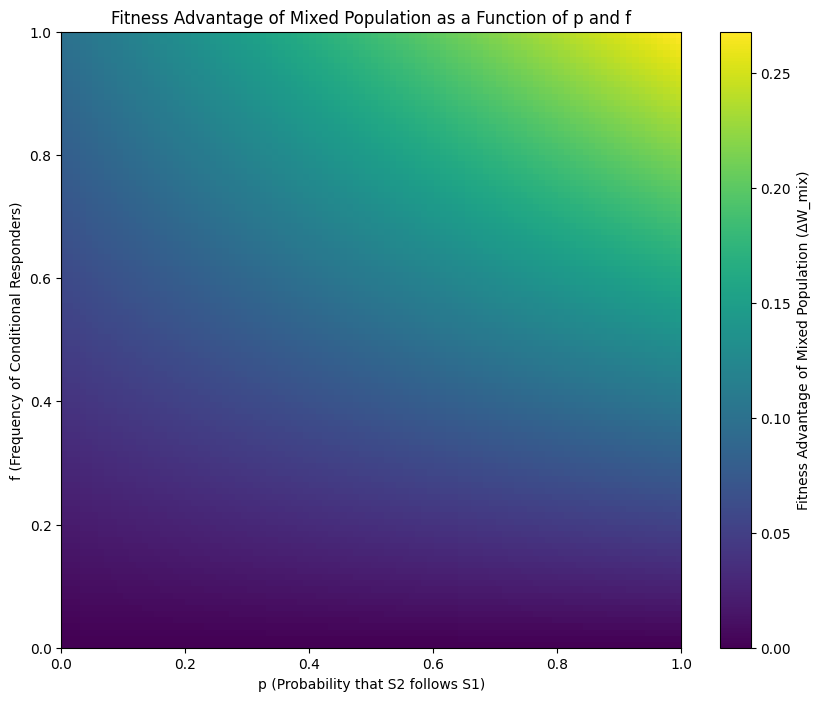

In [5]:
# run the average fitness advantage function and create heatmap:

heatmap_data = calc_fitness_diff(F, P, eta, kappa, Ts1, alpha, delta_t)

# Create the 2D Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, origin='lower', extent=[0, 1, 0, 1], aspect='auto', cmap='viridis')
plt.colorbar(label='Fitness Advantage of Mixed Population (ΔW_mix)')
plt.xlabel('p (Probability that S2 follows S1)')
plt.ylabel('f (Frequency of Conditional Responders)')
plt.title('Fitness Advantage of Mixed Population as a Function of p and f')
plt.grid(False) # Turn off grid for cleaner heatmap
plt.show()


In [6]:
# Analysis and Interpretation (Updated for the new function's critical point)
# The critical point where delta_f_cr_minus_dr = 0
# benefit - cost = 0
# p_crit * ((1 - eta) * kappa * ((1 - (e**(- alpha * delta_t)))/alpha) - (eta * delta_t)) = (1 - p_crit) * (eta * Ts1)
# Let A = (1 - eta) * kappa * ((1 - (e**(- alpha * delta_t)))/alpha) - (eta * delta_t)
# Let B = eta * Ts1
# p_crit * A = B - p_crit * B
# p_crit * A + p_crit * B = B
# p_crit * (A + B) = B
# p_crit = B / (A + B)

A = (1 - eta) * kappa * ((1 - (np.exp(- alpha * delta_t)))/alpha) - (eta * delta_t)
B = eta * Ts1

# Handle division by zero if A + B is very close to zero
if (A + B) != 0:
    p_critical = B / (A + B)
else:
    p_critical = np.nan # Or handle as a special case if A+B is zero

print(f"\nModel Parameters (for new function):")
print(f"  Eta (cost parameter): {eta}")
print(f"  Kappa (benefit coefficient): {kappa}")
print(f"  Ts1 (duration S1 exposure): {Ts1}")
print(f"  Alpha (dilution/degradation rate): {alpha:.4f}")
print(f"  Delta t (delay): {delta_t}")
print(f"\nCritical p value where ΔW(p) = 0: {p_critical:.4f}")

print("\n--- Analysis of Heatmap and Correlation (Updated for new function) ---")
print("The heatmap shows the fitness advantage (ΔW_mix) of the mixed population over a purely Direct Response (DR) population, calculated using your new `calc_fitness_diff` function.")
print("The color scale indicates this advantage, with warmer colors representing a higher advantage and cooler colors representing a disadvantage or no advantage.")

print("\nCorrelation between p and f:")
print("1. Positive correlation with f (frequency of conditional responders):")
print("   As 'f' increases (moving up the Y-axis), the fitness advantage generally increases or decreases more steeply, depending on the sign of `delta_f_cr_minus_dr`. This is because ΔW_mix = f * `delta_f_cr_minus_dr`. If `delta_f_cr_minus_dr` is positive, increasing 'f' linearly increases the advantage. If `delta_f_cr_minus_dr` is negative, increasing 'f' linearly increases the disadvantage.")

print(f"2. Dependence on p (probability that S2 follows S1):")
print(f"   The behavior along the X-axis ('p') is determined by `delta_f_cr_minus_dr` (the fitness difference between CR and DR).")
print(f"   - When p < {p_critical:.4f}: `delta_f_cr_minus_dr` is negative. This means the Conditional Response (CR) strategy has a *disadvantage* compared to DR.")
print(f"     In this region, ΔW_mix will also be negative (or zero if f=0), indicating that a mixed population (with f > 0) is less fit than a pure DR population.")
print(f"     The heatmap will show cooler colors, indicating a disadvantage.")
print(f"   - When p = {p_critical:.4f}: `delta_f_cr_minus_dr` is zero. At this point, the CR strategy has no advantage or disadvantage over DR.")
print(f"     Consequently, ΔW_mix will be zero for any 'f', meaning the mixed population has no fitness advantage over pure DR.")
print(f"   - When p > {p_critical:.4f}: `delta_f_cr_minus_dr` is positive. This means the Conditional Response (CR) strategy has an *advantage* over DR.")
print(f"     In this region, ΔW_mix will be positive (for f > 0), indicating that a mixed population is fitter than a pure DR population.")
print(f"     The heatmap will show warmer colors, indicating an advantage, with the advantage increasing as 'f' increases.")

print("\nBiological Interpretation (Updated for new function):")
print("The new fitness function introduces different dependencies on parameters like `Ts1` and `alpha` within the benefit and cost terms. However, the fundamental interpretation remains similar: the Conditional Response (CR) strategy carries costs (e.g., `eta * delta_t` for the delay, `eta * Ts1` for the S1 exposure duration when S2 doesn't follow) but offers a benefit (`(1 - eta) * kappa * ...`) if the prediction is correct.")
print("The `p_critical` value still represents the threshold predictability. Below this threshold, the costs of CR outweigh the benefits, making DR more favorable. Above it, CR becomes advantageous.")

print("\nConditions for a Favorable Mixed Strategy (Updated for new function):")
print("As before, based on this model's structure where ΔW_mix = f * ΔW(p), if `p` is constant:")
print(" - If `delta_f_cr_minus_dr` > 0 (i.e., p > p_critical), the maximum fitness advantage is achieved at f=1 (pure CR population).")
print(" - If `delta_f_cr_minus_dr` < 0 (i.e., p < p_critical), the maximum fitness (least disadvantage) is achieved at f=0 (pure DR population).")
print("Therefore, a mixed strategy (0 < f < 1) is not the single 'optimal' strategy in a constant environment for maximizing fitness advantage. However, as discussed previously, mixed strategies are highly relevant in *variable* environments where 'p' fluctuates, allowing the population to hedge its bets against uncertainty.")
print("The exact values of `eta`, `kappa`, `Ts1`, `alpha`, and `delta_t` will determine the precise value of `p_critical` and the steepness of the fitness landscape, influencing how strongly selection might push towards one pure strategy or the other.")



Model Parameters (for new function):
  Eta (cost parameter): 0.1
  Kappa (benefit coefficient): 0.5
  Ts1 (duration S1 exposure): 1
  Alpha (dilution/degradation rate): 0.6931
  Delta t (delay): 3

Critical p value where ΔW(p) = 0: 0.2717

--- Analysis of Heatmap and Correlation (Updated for new function) ---
The heatmap shows the fitness advantage (ΔW_mix) of the mixed population over a purely Direct Response (DR) population, calculated using your new `calc_fitness_diff` function.
The color scale indicates this advantage, with warmer colors representing a higher advantage and cooler colors representing a disadvantage or no advantage.

Correlation between p and f:
1. Positive correlation with f (frequency of conditional responders):
   As 'f' increases (moving up the Y-axis), the fitness advantage generally increases or decreases more steeply, depending on the sign of `delta_f_cr_minus_dr`. This is because ΔW_mix = f * `delta_f_cr_minus_dr`. If `delta_f_cr_minus_dr` is positive, incre